In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

## 日期和时间数据类型及工具

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2018, 12, 18, 12, 34, 27, 293085)

In [5]:
now.year, now.month, now.day

(2018, 12, 18)

datetime以毫秒形式存储日期和时间。datetime.timedelta表示两个datetime对象之间的时间差：

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象：

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## 字符串和datetime的相互转换
利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串：

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d'), stamp.strftime('%F')

('2011-01-03', '2011-01-03')

datetime格式定义
```
%Y  4位数的年
%y  2位数的年
%m  2位数的月[01, 12]
%d  2位数的日[01, 31]
%H  时（24小时制）[00, 23]
%I  时（12小时制）[01, 12]
%M  2位数的分[00, 59]
%S  秒[00, 61]（秒60和61用于闰秒）
%w  用整数表示的星期几[0（星期天），6]
%F  %Y-%m-%d简写形式，例如2012-04-18
%D  %m/%d/%y简写形式，例如04/18/12
```

datatime.strptime也可以用这些格式化编码将字符串转换为日期：

In [17]:
value = '2011-01-03'

In [18]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
datestrs = ['7/6/2011', '8/6/2011']

In [20]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式，这种情况下，你可以用dateutil这个第三方包中的parser.parse方法：

In [21]:
from dateutil.parser import parse

In [22]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil可以解析几乎所有人类能够理解的日期表示形式：

In [23]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在国际通用的格式中，日通常出现在月的前面，传入dayfirst=True即可解决这个问题：

In [24]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。

In [25]:
datestrs

['7/6/2011', '8/6/2011']

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

它还可以处理缺失值（None、空字符串等）：

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

NaT（Not a Time）是pandas中时间戳数据的NA值。

## 时间序列基础
pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datetime对象表示）为索引的Series：

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
ts = Series(np.random.randn(6), index=dates)

In [33]:
ts

2011-01-02   -0.435580
2011-01-05    0.051955
2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-10   -0.570636
2011-01-12   -0.007911
dtype: float64

这些datetime对象实际上是被放在一个DatatimeIndex中的。现在，变量ts就成为一个TimeSeries了：（书上这样说，可是输出的类型还是Series）

In [34]:
type(ts)

pandas.core.series.Series

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [36]:
ts + ts[::2]

2011-01-02   -0.871159
2011-01-05         NaN
2011-01-07    2.266532
2011-01-08         NaN
2011-01-10   -1.141272
2011-01-12         NaN
dtype: float64

pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳：

In [37]:
ts.index.dtype

dtype('<M8[ns]')

DatatimeIndex中的各个标量值是pandas的Timestamp对象：

In [38]:
stamp = ts.index[0]

In [39]:
stamp

Timestamp('2011-01-02 00:00:00')

## 索引、选取、子集的构造

In [40]:
stamp = ts.index[2]

In [41]:
ts[stamp]

1.1332658820139554

还有一种更为方便的用法：传入一个可以被解释为日期的字符串。

In [42]:
ts['1/10/2011']

-0.5706361826847333

In [43]:
ts['20110110']

-0.5706361826847333

对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片：

In [44]:
long_ts = Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [45]:
long_ts

2000-01-01   -0.607615
2000-01-02   -1.291193
2000-01-03   -0.196906
2000-01-04   -0.266035
2000-01-05   -0.255389
2000-01-06   -0.365585
2000-01-07    1.216110
2000-01-08   -0.620389
2000-01-09   -0.880904
2000-01-10   -1.162369
2000-01-11    0.549027
2000-01-12   -1.698801
2000-01-13    1.441069
2000-01-14    0.344856
2000-01-15   -0.792266
2000-01-16    0.647482
2000-01-17   -0.420248
2000-01-18   -0.144649
2000-01-19    0.397945
2000-01-20   -0.223671
2000-01-21    2.122932
2000-01-22    0.592203
2000-01-23   -1.445637
2000-01-24    1.328789
2000-01-25   -0.378529
2000-01-26   -0.106525
2000-01-27    1.857225
2000-01-28    0.158230
2000-01-29   -1.300515
2000-01-30   -0.932272
                ...   
2002-08-28   -0.421015
2002-08-29   -1.740539
2002-08-30   -0.773208
2002-08-31    0.135007
2002-09-01    0.404389
2002-09-02   -1.069653
2002-09-03   -1.321554
2002-09-04   -0.190766
2002-09-05    0.221223
2002-09-06   -0.267216
2002-09-07    0.651004
2002-09-08    0.001944
2002-09-09 

In [46]:
long_ts['2001']

2001-01-01    0.738479
2001-01-02    1.154960
2001-01-03    1.251721
2001-01-04   -0.447891
2001-01-05   -0.525711
2001-01-06    0.425154
2001-01-07   -0.827778
2001-01-08    0.520196
2001-01-09   -0.317195
2001-01-10   -0.949959
2001-01-11   -1.486443
2001-01-12   -0.473564
2001-01-13   -0.501754
2001-01-14    0.407781
2001-01-15   -0.352536
2001-01-16   -0.254330
2001-01-17   -0.466010
2001-01-18    0.282599
2001-01-19    0.364977
2001-01-20    1.309742
2001-01-21   -1.405982
2001-01-22    1.092171
2001-01-23   -0.685125
2001-01-24    1.633115
2001-01-25    0.252457
2001-01-26   -0.855075
2001-01-27   -0.755442
2001-01-28   -0.279156
2001-01-29    0.621193
2001-01-30   -2.179852
                ...   
2001-12-02   -1.434696
2001-12-03    0.033121
2001-12-04    0.524054
2001-12-05    1.251072
2001-12-06   -1.612438
2001-12-07   -1.079646
2001-12-08    0.746091
2001-12-09    0.094471
2001-12-10    0.566353
2001-12-11    1.232380
2001-12-12   -0.488354
2001-12-13   -0.178944
2001-12-14 

In [47]:
long_ts['2001-05']

2001-05-01    1.433545
2001-05-02    2.168596
2001-05-03   -0.584471
2001-05-04    0.905805
2001-05-05    0.852339
2001-05-06    0.787811
2001-05-07   -0.629023
2001-05-08    0.718899
2001-05-09   -0.470626
2001-05-10   -0.245557
2001-05-11   -0.998174
2001-05-12    0.479478
2001-05-13   -0.888773
2001-05-14    0.301803
2001-05-15   -0.253387
2001-05-16   -1.221842
2001-05-17   -0.289062
2001-05-18    0.954481
2001-05-19   -0.578541
2001-05-20   -0.403204
2001-05-21    1.403455
2001-05-22   -0.802005
2001-05-23   -0.745594
2001-05-24    1.361174
2001-05-25   -0.707424
2001-05-26    0.536884
2001-05-27    0.601264
2001-05-28    0.519521
2001-05-29   -1.580590
2001-05-30   -0.709920
2001-05-31   -0.320002
Freq: D, dtype: float64

通过日期进行切片的方式只对规则Series有效：

In [48]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-10   -0.570636
2011-01-12   -0.007911
dtype: float64

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）：

In [49]:
ts

2011-01-02   -0.435580
2011-01-05    0.051955
2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-10   -0.570636
2011-01-12   -0.007911
dtype: float64

In [50]:
ts['1/6/2011': '1/11/2011']

2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-10   -0.570636
dtype: float64

跟之前一样，这里可以传入字符串日期、datetime或Timestamp。注意，这样切片产生的源时间序列的视图，跟NumPy数组的切片运算是一样的。此外，还有一个等价的示例方法也可以截取两个日期之间TimeSeries：

In [51]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.435580
2011-01-05    0.051955
2011-01-07    1.133266
2011-01-08   -1.673454
dtype: float64

上面这些操作对DataFrame也有效。例如，对DataFrame的行进行索引：

In [52]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # 日期偏移量为一周

In [53]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [54]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.697594,-0.988953,-1.384354,0.629775
2001-05-09,1.736991,0.611851,0.094600,0.718529
2001-05-16,-1.573155,0.118889,-0.475383,-0.043276
2001-05-23,-0.009926,-0.011799,0.123836,-0.064457
2001-05-30,0.355577,-0.046948,0.934691,1.260367


## 带有重复索引的时间序列
在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况。

In [55]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [56]:
dup_ts = Series(np.arange(5), index=dates)

In [57]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

通过检查索引的is_unique属性，我们就可以知道它是不是唯一的：

In [58]:
dup_ts.index.is_unique

False

对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间点是否重复：

In [59]:
dup_ts['1/3/2000'] # 不重复

4

In [60]:
dup_ts['1/2/2000'] # 重复

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0（索引的唯一一层！）：

In [61]:
grouped = dup_ts.groupby(level=0)

In [62]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [63]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及移动
pandas中的时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。例如我们可以将之前那个时间序列转换为一个具有固定频率（每日）的时间序列，只需调用resample即可：

In [64]:
ts

2011-01-02   -0.435580
2011-01-05    0.051955
2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-10   -0.570636
2011-01-12   -0.007911
dtype: float64

In [65]:
ts.resample('D').mean()

2011-01-02   -0.435580
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.051955
2011-01-06         NaN
2011-01-07    1.133266
2011-01-08   -1.673454
2011-01-09         NaN
2011-01-10   -0.570636
2011-01-11         NaN
2011-01-12   -0.007911
Freq: D, dtype: float64

## 生成日期范围
pandas.date_range可用于生成指定长度的DatatimeIndex：

In [66]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字：

In [68]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组成的日期索引，可以传入“BM”频率（business end of month），这样就只会包含时间间隔（或刚好在边界上的）符合频率要求的日期：

In [70]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

date_range默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [71]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时间戳。normalize选项即可实现该功能：

In [72]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量
pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如“M”表示月，“H”表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。例如，按小时计算的频率可以用Hour类表示：

In [73]:
from pandas.tseries.offsets import Hour, Minute

In [74]:
hour = Hour()

In [75]:
hour

<Hour>

传入一个整数即可定义偏移量的倍数：

In [76]:
four_hours = Hour(4)

In [77]:
four_hours

<4 * Hours>

一般来说，无需显示创建这样的对象，只需使用诸如“H”或“4H”这样的字符串别名即可。在基础频率前面放上一个整数即可创建倍数：

In [78]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可以通过加法进行连接：

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

同理，你也可以传入频率字符串（如“2h30min”），这种字符串可以被高效地解析为等效的表达式：

In [80]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率所描述的时间点并不是均匀分隔的。例如，“M”（日历月末）和“BM”（每月最后一个工作日）就取决于每月的天数，对于后者，还要考虑月末是不是周末。由于没有更好的术语，我将这些称为锚点偏移量

## WOM日期
WOM（Week of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每个月第3个星期五”之类的日期：

In [81]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

美国的股票期权交易人会意识到这些日子就是标准的月度到期日。

## 移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法执行单纯的前移或后移操作，保持索引不变：

In [83]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [84]:
ts

2000-01-31   -1.429902
2000-02-29   -0.074393
2000-03-31   -2.418927
2000-04-30    1.601632
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.429902
2000-04-30   -0.074393
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31   -2.418927
2000-02-29    1.601632
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化，可以这样表达：

In [87]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -0.947974
2000-03-31    31.515631
2000-04-30    -1.662125
Freq: M, dtype: float64

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移：

In [88]:
ts.shift(2, freq='M')

2000-03-31   -1.429902
2000-04-30   -0.074393
2000-05-31   -2.418927
2000-06-30    1.601632
Freq: M, dtype: float64

这里还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理了：

In [89]:
ts.shift(3, freq='D')

2000-02-03   -1.429902
2000-03-03   -0.074393
2000-04-03   -2.418927
2000-05-03    1.601632
dtype: float64

In [90]:
ts.shift(1, freq='3D')

2000-02-03   -1.429902
2000-03-03   -0.074393
2000-04-03   -2.418927
2000-05-03    1.601632
dtype: float64

In [91]:
ts.shift(1, freq='90T') # T或min表示Minute

2000-01-31 01:30:00   -1.429902
2000-02-29 01:30:00   -0.074393
2000-03-31 01:30:00   -2.418927
2000-04-30 01:30:00    1.601632
Freq: M, dtype: float64

### 通过偏移量对日期进行位移
pandas的日期偏移量还可以用在datetime或Timestamp对象上：

In [92]:
from pandas.tseries.offsets import Day, MonthEnd

In [93]:
now = datetime(2011, 11, 17)

In [94]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果加的是锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期：

In [95]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [96]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

通过锚点偏移量的rollforward和rollback方法，可显式地将日期向前或向后“滚动”：

In [97]:
offset = MonthEnd()

In [98]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [99]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

日期偏移量还有一个巧妙的用法，即结合groupby使用这两个“滚动”方法：

In [100]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [101]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.539848
2000-02-29    0.173425
2000-03-31    0.097180
dtype: float64

当然，更简单、更快速地实现该功能的办法是使用resample：

In [102]:
ts.resample('M').mean()

2000-01-31   -0.539848
2000-02-29    0.173425
2000-03-31    0.097180
Freq: M, dtype: float64

## 时期及其算术运算
时期（period）表示的是时间区间，比如数日、数月、数季、数年等。Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数以及频率：

In [103]:
p = pd.Period(2007, freq='A-DEC') # 每年指定月份，DEC表示十二月

In [104]:
p

Period('2007', 'A-DEC')

这个Period对象表示的是从2007年1月1日到2007年12月31日之间的整段时间。只需对Period对象加上或减去一个整数即可达到根据其频率进行位移的效果：

In [105]:
p + 5

Period('2012', 'A-DEC')

In [106]:
p - 2

Period('2005', 'A-DEC')

如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量：

In [107]:
pd.Period('2014', freq='A-DEC') - p

7

period_range函数可用于创建规则的时期范围：

In [108]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')

In [109]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引：

In [110]:
Series(np.random.randn(6), index=rng)

2000-01   -0.027688
2000-02    1.513159
2000-03    1.024959
2000-04    0.745792
2000-05    0.027271
2000-06   -0.911445
Freq: M, dtype: float64

PeriodIndex类的构造函数还允许直接使用一组字符串：

In [111]:
values = ['200103', '200202', '200301']

In [112]:
# Q-DEC QuarterEnd，对于以指定月份（JAN、...、DEC）结束的年度，每季度最后一月的最后一个日历日
index = pd.PeriodIndex(values, freq='Q-DEC')

In [113]:
index

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换
Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期：

In [114]:
p = pd.Period('2007', freq='A-DEC')

In [115]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [116]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [117]:
p = pd.Period('2007', freq='A-JUN')

In [118]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [119]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定的。例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的：

In [120]:
p = pd.Period('2007-08', 'M')

In [121]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

PeriodIndex或TimeSeries的频率转换方式也是如此：

In [122]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [123]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [124]:
ts

2006    0.150109
2007   -0.921895
2008   -1.680238
2009   -0.194170
Freq: A-DEC, dtype: float64

In [125]:
ts.asfreq('M', how='start')

2006-01    0.150109
2007-01   -0.921895
2008-01   -1.680238
2009-01   -0.194170
Freq: M, dtype: float64

In [126]:
ts.asfreq('B', how='end') # BusinessDay 工作日

2006-12-29    0.150109
2007-12-31   -0.921895
2008-12-31   -1.680238
2009-12-31   -0.194170
Freq: B, dtype: float64

### 按季度计算的时期频率
季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的概念，通常一年12个月中某月的最后一个日历日或工作日。就这一点来说，时期“2012Q4”根据财年末的不同会有不同的含义。pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC：

In [127]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [128]:
p

Period('2012Q4', 'Q-JAN')

在以1月份结束的财年中，2012Q4是从11月到1月。

In [129]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [130]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

因此，Period之间的算术运算会非常简单。例如，要获取该季度倒数第二个工作日下午4点的时间戳：

In [131]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [132]:
p4pm

Period('2012-01-30 16:00', 'T')

In [133]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

period_range还可以用于生成季度型范围。季度型范围的算术运算也跟上面是一样的：

In [134]:
rng = pd.period_range('2011Q3', '2014Q4', freq='Q-JAN')

In [135]:
ts = Series(np.arange(len(rng)), index=rng)

In [136]:
ts

2011Q3     0
2011Q4     1
2012Q1     2
2012Q2     3
2012Q3     4
2012Q4     5
2013Q1     6
2013Q2     7
2013Q3     8
2013Q4     9
2014Q1    10
2014Q2    11
2014Q3    12
2014Q4    13
Freq: Q-JAN, dtype: int32

In [137]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [138]:
ts.index = new_rng.to_timestamp()

In [139]:
ts

2010-10-28 16:00:00     0
2011-01-28 16:00:00     1
2011-04-28 16:00:00     2
2011-07-28 16:00:00     3
2011-10-28 16:00:00     4
2012-01-30 16:00:00     5
2012-04-27 16:00:00     6
2012-07-30 16:00:00     7
2012-10-30 16:00:00     8
2013-01-30 16:00:00     9
2013-04-29 16:00:00    10
2013-07-30 16:00:00    11
2013-10-30 16:00:00    12
2014-01-30 16:00:00    13
dtype: int32

### 将Timestamp转换为Period（及其反向过程）
通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为以时期索引：

In [140]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')

In [141]:
ts = Series(np.random.randn(3), index=rng)

In [142]:
pts = ts.to_period()

In [143]:
ts

2000-01-31   -0.659966
2000-02-29    0.830223
2000-03-31    1.719227
Freq: M, dtype: float64

In [144]:
pts

2000-01   -0.659966
2000-02    0.830223
2000-03    1.719227
Freq: M, dtype: float64

In [145]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [146]:
ts2 = Series(np.random.randn(6), index=rng)

In [147]:
ts2

2000-01-29   -0.826975
2000-01-30   -0.325797
2000-01-31    1.444136
2000-02-01    0.869434
2000-02-02   -0.083737
2000-02-03   -0.813974
Freq: D, dtype: float64

In [148]:
ts2.to_period('M')

2000-01   -0.826975
2000-01   -0.325797
2000-01    1.444136
2000-02    0.869434
2000-02   -0.083737
2000-02   -0.813974
Freq: M, dtype: float64

要转换为时间戳，使用to_timestamp即可：

In [149]:
pts.to_timestamp(how='end')

2000-01-31   -0.659966
2000-02-29    0.830223
2000-03-31    1.719227
Freq: M, dtype: float64

In [150]:
pts

2000-01   -0.659966
2000-02    0.830223
2000-03    1.719227
Freq: M, dtype: float64

### 通过数组创建PeriodIndex
固定频率的数据集通常会将时间信息分开存放在多个列中。例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中：

In [151]:
data = pd.read_csv('macrodata.csv')

In [152]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [153]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

将这两个数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引：

In [154]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [155]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [156]:
data.index = index

In [157]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 重采样及频率转换
重采样（resanpling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。  
并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI即不是降采样也不是升采样。

pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数：

In [158]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

In [159]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [160]:
ts.resample('M').mean()

2000-01-31   -0.098875
2000-02-29   -0.028995
2000-03-31    0.320169
2000-04-30   -0.288606
Freq: M, dtype: float64

In [161]:
ts.resample('M', kind='period').mean()

2000-01   -0.098875
2000-02   -0.028995
2000-03    0.320169
2000-04   -0.288606
Freq: M, dtype: float64

### 降采样

In [162]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')

In [163]:
ts = Series(np.arange(12), index=rng)

In [164]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

假设你想要通过求和的方式将这些数据聚合到“5分钟”块中：

In [165]:
ts.resample('5min').sum() # 默认closed='left',label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [166]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

### OHLC重采样
金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。整个过程很高效，只需一次扫描即可计算出结果：

In [167]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 时间序列绘图
pandas时间序列的绘图功能在日期格式化方面比matplotlib原生的要好。

In [168]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [169]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [170]:
close_px = close_px.resample('B').ffill() # BusinessDay 工作日

In [171]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


对其中任意一列调用plot即可生成一张简单的图表：

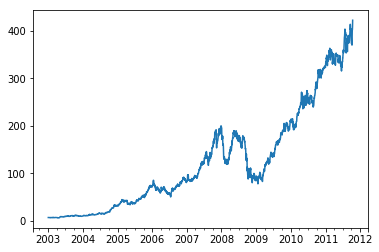

In [172]:
close_px['AAPL'].plot()

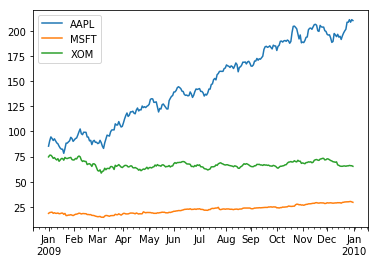

In [173]:
close_px.loc['2009'].plot()

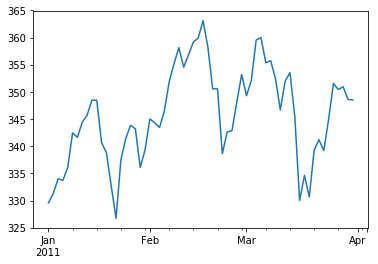

In [174]:
# 苹果公司在2011年1月到3月的每日股价。
close_px['AAPL'].loc['01-2011': '03-2011'].plot()

季度型频率的数据会用季度标记进行格式化，这种事情如果纯手工做的话很费精力。

In [175]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

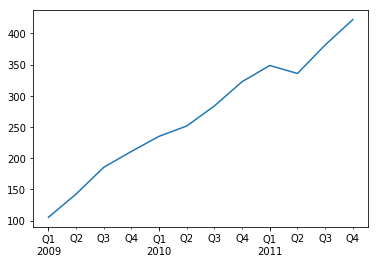

In [176]:
appl_q.loc['2009':].plot()

## 移动窗口函数
在移动窗口（可以带有值数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。我将它们称为移动窗口函数（moving window function），其中还包括那些窗口不定长的函数（如值数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。

rolling_mean是其中最简单的一个。它接受一个TimeSeries或DataFrame以及一个window（表示期数）：

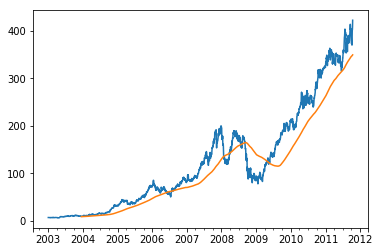

In [177]:
"""rolling_mean在新版中换为Series.rolling().mean()"""
close_px.AAPL.plot()
# 苹果公司股价的250日均线
Series.rolling(close_px.AAPL, 250).mean().plot()

默认情况下，诸如rolling_mean这样的函数需要指定数量的非NA观测值。可以修改该行为以解决缺失数据的问题。其实在时间序列开始尚不足窗口期的那些数据就是个特例。

In [178]:
appl_std250 = Series.rolling(close_px.AAPL, 250, min_periods=10).std()

In [179]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

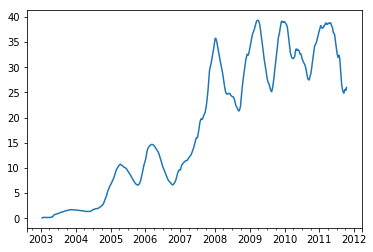

In [180]:
# 苹果公司250日每日回报标准差
appl_std250.plot()

要计算扩展窗口平均（expanding windows mean），你可以将扩展窗口看做一个特殊的窗口，其长度与时间序列一样，但只需一期（或多期）即可计算一个值：

In [181]:
# 通过rolling_mean定义扩展平均
expanding_mean = lambda x: Series.rolling(x, len(x), min_periods=1).mean()

对DataFrame调用rolling_mean（以及与之类似的函数）会将转换应用到所有的列上：

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


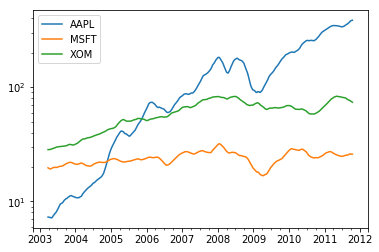

In [182]:
Series.rolling(close_px, 60).mean().plot(logy=True) # y轴的对数图形

### 指数加权函数
另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。  
用数学术语来讲，如果$ma_t$是时间t的移动平均结果，x是时间序列，结果中的各个值可用$ma_t = a*ma_{t-1} + (a - 1)*x_{-t}$进行计算，其中a为衰减因子。衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数。

由于值数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变化。下面这个例子对比了苹果公司股价的60日移动平均和span=60的值数加权平均：

Text(0.5,1,'Exponentially-weighted MA')

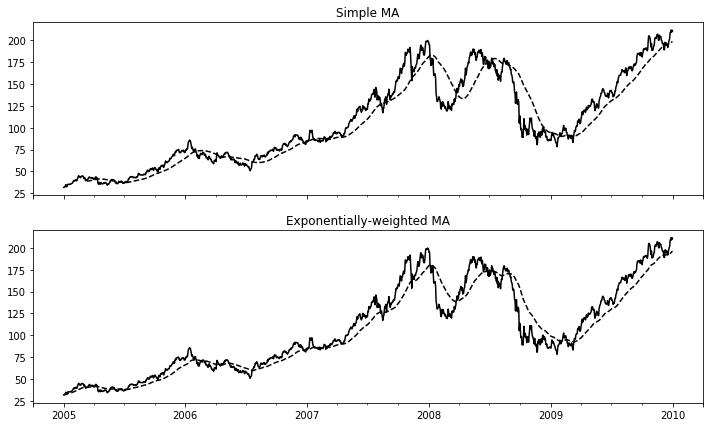

In [183]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
appl_px = close_px.AAPL['2005':'2009']

ma60 = Series.rolling(appl_px, 60, min_periods=50).mean()
ewma60 = Series.ewm(appl_px, span=60).mean()

appl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
appl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 二元移动窗口函数
有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。例如，金融分析师常常对某只股票对某个参考值数（如标准普尔500值数）的相关系数感兴趣。我们可以通过计算百分数变化并使用rolling_corr的方式得到该结果：

In [184]:
spx_px = close_px_all['SPX']

In [185]:
spx_rets = spx_px / spx_px.shift(1) - 1

In [186]:
returns = close_px.pct_change()

In [187]:
corr = Series.rolling(returns.AAPL, 125, min_periods=100).corr(spx_rets)

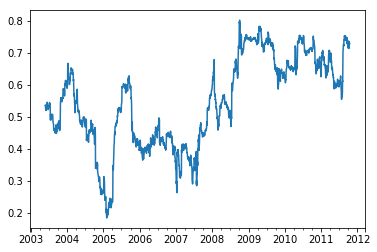

In [188]:
corr.plot()